# Adat:

## leírás

Az adat amivel játszani lehet, az én saját teljes facebook messenger historym, 2010-től, keddig. Azért nem láttok belőle mindent, a következők a korlátok:

- az üzeneteket nem látjátok, csak a hosszukat, karakterben
- a neveket kicserélgettem. mindenkinek a nevét véletlenszerűen kicseréltem egy híres emberével (a forbes celebrity top100-ból és oszkárdíjas/oszkár jelölt színészek közül válogatva)
- a névcsere konziztens, így egy híresség mindig ugyanazt az embert jelöli (akkoris ha a csetben esetleg valaki megváltoztatta a nevét)
- fotók, videók, stickerek és gifek sincsenek meg, csak hogy adott üzenetben a küldő hány ilyet küldött

## forma

- az adat json formátumban van, amit a pythonba úgy fogunk beolvasni hogy egy listát kapunk amiben dictionaryk vannak
- minden dictionary egy csetben történt eseményt jelöl. vagy egy elküldött üzenetet, vagy azt hogy valaki megosztott valamilyen tartalmat, vagy azt, hogy valakit felvettek a beszélgetésbe vagy kirakták/kirakta magát
- minden dictionaryben 19 key van, amik a következőket jelentik:
    - **type** ez négy féle dolog lehet:
        - Generic: ez azt jelenti, hogy a dictionary egy sima üzenetet jelöl
        - Share: ez, hogy valami tartalom megosztását jelenti
        - Subscribe: ez azt jelenti hogy valaki hozzáadott valakit a beszélgetéshez
        - Unsubscribe: ez azt jelenti hogy valaki levett valakit a beszélgetésről
    - sender_name: *string*, a küldő, megosztó, vagy beszélgetésbe felvevő/leszedő neve átkódolva híres emberré
    - datetime/timestamp_ms/year/month/day/hour/minute: ezek az esemény idejét jelzik
        - az egyetlen ami talán nem világos közülük az a timestamp_ms, az az 1970 január 1 óta eltelt miliszekundumok számát jelzi. arra pl elég jó hogy nagyon könnyen ki lehet vele számolni két esemény között eltelt időt, meg összehasonlításra is szuper
    - content: *float*, ez mindig az üzenetben elküldött karakterek számát jelöli
    - gifs/videos/photos/sticker: ezek a nevükben megfogalmazott tartalomtípus darabszámát jelölik az üzenetben
    - reactions: ez egy lista azokról az emberekről, akik reactokat nyomkodtak az üzenetre
    - users: ez egy lista azokról az emberekről akik a beszélgetéshez hozzá lettek adva, vagy el lettek távolítva (csak akkor aktuális ha a type Subscribe vagy Unsubscribe értéket vesz fel)
    - thread_path: ez egy azonosító, hogy az adott esemény melyik threadben (beszélgetésben) történt
    - thread_type: ez az, hogy milyen fajta thread (beszélgetés), csoportos vagy egyéni. ennek két releváns értéke Regular és RegularGroup
    - index: ez az adott esemény indexe, évenként egyedi
- **az adat nincs időrendi sorrendben** ha olyan feladatot szeretnétek megoldani, amihez ez hasznos, nektek kell sorbarakni

# Segítség:

## Az adat évenként van külön fájlokba szedve, így tudom pl 2011-et beolvasni:

In [8]:
import json

In [10]:
path_to_file = 'data/2011-msg.json'

In [12]:
list_of_dicts_2011 = json.load(open(path_to_file, 'r'))

In [14]:
type(list_of_dicts_2011)

list

In [15]:
print(list_of_dicts_2011)

[{'index': 8596, 'sender_name': 'Taylor Swift', 'timestamp_ms': 1321891169956, 'type': 'Generic', 'users': [], 'reactions': [], 'photos': 0, 'sticker': None, 'thread_path': 551, 'thread_type': 'Regular', 'gifs': 0, 'videos': 0, 'content_l': 23, 'datetime': '2011-11-21T16:59:29.956Z', 'year': 2011, 'month': 11, 'day': 21, 'hour': 16, 'minute': 59}, {'index': 8416, 'sender_name': 'Christopher Walken', 'timestamp_ms': 1324835782695, 'type': 'Generic', 'users': [], 'reactions': [], 'photos': 0, 'sticker': None, 'thread_path': 551, 'thread_type': 'Regular', 'gifs': 0, 'videos': 0, 'content_l': 3, 'datetime': '2011-12-25T18:56:22.695Z', 'year': 2011, 'month': 12, 'day': 25, 'hour': 18, 'minute': 56}, {'index': 315, 'sender_name': 'Céline Dion', 'timestamp_ms': 1317503284282, 'type': 'Generic', 'users': [], 'reactions': [], 'photos': 0, 'sticker': None, 'thread_path': 848, 'thread_type': 'Regular', 'gifs': 0, 'videos': 0, 'content_l': 71, 'datetime': '2011-10-01T23:08:04.282Z', 'year': 2011, 

In [22]:
len(list_of_dicts_2011)

6361

## A python string formázós technikájával változóban tárolt évre is be lehet olvasni:

In [21]:
my_year = 2012
path_to_file2 = 'data/{}-msg.json'.format(my_year)

In [22]:
path_to_file2

'data/2012-msg.json'

In [24]:
list_of_dicts_2012 = json.load(open(path_to_file2,'r'))

In [25]:
len(list_of_dicts_2012)

61961

## Ha esetleg szeretnétek valamit ábrázolni, javaslom hozzá a matplotlib package-et

### itt egy példa arról, hogy hogyan készül egy histogramm az események hónapokra vonatkozó eloszlásáról (2012-ből)

'tadaa!'

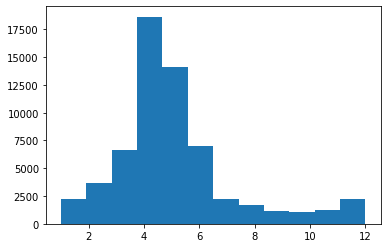

In [17]:
#készítek egy listát amibe minden eseménynél berakom a hónapot
event_months = []
for dic in list_of_dicts_2012:
    event_months.append(dic['month'])

#importálom matplotlibet és beállítom hogy faszán működjön jupyter notebookban
#ezt érdemes csak egyszer a notebook elején
import matplotlib.pyplot as plt
%matplotlib inline

#ezzel a borzasztó egyszerű parancsal elkészítem a histogrammot
plt.hist(event_months,bins=12)

"tadaa!"

# Explore feladatok

- melyik vagyok én? (1 pont)

Listán belül - minden évben igaz lesz valószínűleg - az adott éven belül 
(1) ki van benne az összes beszélgetésbe / csoportbeszélgetése
pl. 2011-ben ki volt benne az összes beszélgetésben / legtöbb beszélgetésben
vagy kihez tartozik a legtöbb esemény
egy listában összegyűjtjük a unique eseményeket: végigiterál, ha még nincs benne az új listában, hozzáadjuk az új listához




- melyik a jeszk-moments? (2 pont) A.1
- melyik a 2017-es db-cset? (5 pont) A.1


- hányan vannak akik minden évben küldtek üzenetet? (3 pont) B.1.2
- hányan vannak akik pontosan n évben küldtek üzenetet (2 pont, ábrázolásért +1) B.1.1
- ki írja átlagosan a leghosszabb üzeneteket? (2 pont) C.1
- ki van bent a második legtöbb csetben? (3 pont) C.2
- melyik az a cset ahol a legtöbb idő telt el két üzenet között és mennyi idő? (4 pont) A.2

Közben írjunk plusz kérdéseket!

# Függvény Feladatok

Vagy iterálunk az évek között, vagy egybetesszük az egészet

- megadok egy timestamp-et, ki az eddigi leghosszabb üzenet szerzője? (1 pont)
- megadok egy timestamp-et, melyik óra eddig a legkevésbé aktív (1 pont) -Ez az 1. feladat átalakítása
- megadok egy timestamp-et, hányan írtak eddig legalább 10 üzenetet? (3 pont) 
- megadok egy timestamp-et, mi volt a leghosszabb periódus eddig üzenet nélkül (7 pont)
- megadok egy timestamp-et és egy embert, mond meg hány karaktert küldött eddig (2 pont)
- megadok egy timestamp-et és egy csetet (thread_path) összesen hány különböző ember, hány üzenetben, hány karaktert írt (4 pont)
- megadok egy timestampet, melyik csetbe és kicsoda írta eddig a legtöbb karaktert addig a pontig (5 pont)
- megadok egy timestamp-et, melyik volt a top5 legaktívabb cset eddig (4 pont)

### bónusz:

- bárhol ahol top1-et keresünk, megadni top5öt +1 pont
- bármelyik csapat dobhat be plusz feladatokat a megbeszélt időkorlátig publikusan, rögtön válaszolok rá, hogy hány pontot érne
- ha olyan feladatot csinálsz meg, amit egyik másik csapat sem tudott +1 pont

KÖZÖS ADATOK BETÖLTÉSE

In [2]:
import json

In [4]:
path_to_file = 'data/2010-msg.json'
path_to_file1 = 'data/2011-msg.json'
path_to_file2 = 'data/2012-msg.json'
path_to_file3 = 'data/2013-msg.json'
path_to_file4 = 'data/2014-msg.json'
path_to_file5 = 'data/2015-msg.json'
path_to_file6 = 'data/2016-msg.json'
path_to_file7 = 'data/2017-msg.json'
path_to_file8 = 'data/2018-msg.json'
path_to_file9 = 'data/2019-msg.json'

In [5]:
list_of_dicts_2010 = json.load(open(path_to_file, 'r'))
list_of_dicts_2011 = json.load(open(path_to_file1, 'r'))
list_of_dicts_2012 = json.load(open(path_to_file2, 'r'))
list_of_dicts_2013 = json.load(open(path_to_file3, 'r'))
list_of_dicts_2014 = json.load(open(path_to_file4, 'r'))
list_of_dicts_2015 = json.load(open(path_to_file5, 'r'))
list_of_dicts_2016 = json.load(open(path_to_file6, 'r'))
list_of_dicts_2017 = json.load(open(path_to_file7, 'r'))
list_of_dicts_2018 = json.load(open(path_to_file8, 'r'))
list_of_dicts_2019 = json.load(open(path_to_file9, 'r'))

In [25]:
all_lists = []

all_lists.extend(list_of_dicts_2010)
all_lists.extend(list_of_dicts_2011)
all_lists.extend(list_of_dicts_2012)
all_lists.extend(list_of_dicts_2013)
all_lists.extend(list_of_dicts_2014)
all_lists.extend(list_of_dicts_2015)
all_lists.extend(list_of_dicts_2016)
all_lists.extend(list_of_dicts_2017)
all_lists.extend(list_of_dicts_2018)
all_lists.extend(list_of_dicts_2019)

In [ ]:
len(all_lists)

A LISTÁKAT KRONOLOGIKUS SORRENDBE RAKÓ FÜGGVÉNY

In [29]:
#a paraméterként megadott dictekből álló listát a timestamp_ms key alapján 
#növekvő sorrendbe rakja (vannak egyenlő értékek is)
def chronologic(input_list):
    sorted_list = sorted(input_list, key = lambda i: i['timestamp_ms'])
    return sorted_list

FÜGGVÉNY FELADATOK MEGOLDÁSA

megadok egy timestamp-et, ki az eddigi leghosszabb üzenet szerzője? (1 pont)

In [113]:
#a paraméterként megadott listában megkeresi, hogy a paraméterként megadott timestampig ki küldte a leghosszabb üzenetet
#és az milyen hosszú
def leghosszabb_uzenet(timestamp, list_of_input):
    longest_message = 0
    sender_of_longest_message = ""
    for i in list_of_input:
        if i["timestamp_ms"]!= timestamp:
            if i["content_l"] > longest_message:
                longest_message = i["content_l"]
                sender_of_longest_message = i["sender_name"]
    return (sender_of_longest_message, longest_message)

In [114]:
leghosszabb_uzenet(1423785600000, all_lists)

('Christopher Walken', 14103)

megadok egy timestamp-et, melyik óra eddig a legkevésbé aktív (1 pont)

In [115]:
#ennek a függvénynek a két paramétere az adott timestamp és a lista
#létrehozok egy olyan dictet, amelyiknek a key-jei a 24 óra és value-k azok az események, amik ott történtek
#visszatérési értéke a leginaktívabb óra
def inaktiv_ora(timestamp, list_of_input):
    sorted_input = chronologic(list_of_input)
    a = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    dict_of_hours = dict(enumerate(a))
    for i in sorted_input:
        if i["timestamp_ms"] != timestamp:
            dict_of_hours[i["hour"]] += 1
    most_inactive_hour = min(dict_of_hours, key = dict_of_hours.get)
    
    return most_inactive_hour

In [116]:
inaktiv_ora(1423785600000, all_lists)

7

- megadok egy timestamp-et, hányan írtak eddig legalább 10 üzenetet? (3 pont)

In [40]:
def legalabb_10_uzenet(timestamp, list_of_input):
    sorted_input = chronologic(list_of_input)
    people_above_9 = 0
    dict_of_names = {}
    for i in sorted_input:
        if i["timestamp_ms"] != timestamp:
            if i["content_l"] > 0:
                if i["sender_name"] in dict_of_names:
                    dict_of_names[i["sender_name"]] += 1
                else:
                    dict_of_names[i["sender_name"]] = 1
    
    
    for key, value in dict_of_names.items(): 
        if value > 9: 
              people_above_9 += 1
    
    return people_above_9

In [41]:
legalabb_10_uzenet(1570399351448, all_lists)

349

megadok egy timestamp-et, mi volt a leghosszabb periódus eddig üzenet nélkül (7 pont)

In [42]:
def leghosszabb_szunet(timestamp, list_of_input):
    sorted_input = chronologic(list_of_input)
    x1 = 0
    x2 = 0
    longest_pause = 0
    for i in sorted_input:
        if i["content_l"] > 0:
            x2 = x1
            x1 = i["timestamp_ms"]
            if x1 - x2 > longest_pause:
                longest_pause = x1 - x2
    
    return longest_pause

In [43]:
leghosszabb_szunet(1570399351448, all_lists)

1281128694000

megadok egy timestamp-et és egy embert, mond meg hány karaktert küldött eddig (2 pont)

In [44]:
def adott_ember_adott_ideig(person, timestamp, list_of_input):
    sorted_input = chronologic(list_of_input)
    cumm_char = 0
    for i in sorted_input:
        if i["timestamp_ms"] != timestamp:
            if i["sender_name"] == person:
                cumm_char += i["content_l"]
    return cumm_char               

In [45]:
adott_ember_adott_ideig("Jack Lemmon", 1570399351448, all_lists)

1270921

megadok egy timestamp-et és egy csetet (thread_path) összesen hány különböző ember, hány üzenetben, hány karaktert írt (4 pont)

In [130]:
def adott_ideig_adott_csetben_hany_ember(timestamp, threadpath, list_of_input):
    sorted_input = chronologic(list_of_input)
    number_of_messages = 0
    number_of_characters = 0
    list_of_names = []
    
    for i in sorted_input:
        if i["timestamp_ms"] != timestamp:
            if i["thread_path"] == threadpath:
                if i["content_l"] > 0:
                    number_of_messages += 1
                    number_of_characters += i["content_l"]
                    if i["sender_name"]not in list_of_names:
                        list_of_names.append(i["sender_name"])
    return len(list_of_names), number_of_messages, number_of_characters
        

In [131]:
adott_ideig_adott_csetben_hany_ember(1487850825288, 465, list_of_dicts_2017)

(11, 31192, 1424254)

megadok egy timestampet, melyik csetbe és kicsoda írta eddig a legtöbb karaktert addig a pontig (5 pont)

In [134]:
def adott_ideig_melyik_csetbe_kicsoda(timestamp, list_of_input):
    sorted_input = chronologic(list_of_input)
    most_character = 0
    for i in sorted_input:
        if i["timestamp_ms"] != timestamp:
            if most_character < i["content_l"]:
                most_character = i["content_l"]
                name_of_sender = i["sender_name"]
                threadpath = i["thread_path"]
    return most_character , name_of_sender , threadpath

In [135]:
adott_ideig_melyik_csetbe_kicsoda(1487850825288, list_of_dicts_2017)

(4223, 'Jack Lemmon', 828)

megadok egy timestamp-et, melyik volt a top5 legaktívabb cset eddig (4 pont)

In [177]:
def legaktivabb_cset(timestamp, list_of_input):
    sorted_input = chronologic(list_of_input)
    dict_of_groups = {}
    for i in sorted_input:
        if i["timestamp_ms"] != timestamp:
            if i["thread_path"] in dict_of_groups:
                dict_of_groups[i["thread_path"]] += 1
            else:
                dict_of_groups[i["thread_path"]] = 1
                
    highest = []  
    max_value = 0
    
    for i in 'hello':
        max_value = max(dict_of_groups, key = dict_of_groups.get)
        highest.append(max_value)
        dict_of_groups[max_value] = 0
            
    return highest

In [178]:
legaktivabb_cset(1487850825288, list_of_dicts_2017)

[465, 855, 828, 104, 755]

ki írja átlagosan a leghosszabb üzeneteket? (2 pont)

In [185]:
list_of_input = list_of_dicts_2017

dict_of_messages = {}
dict_of_characters = {}
dict_of_dicts = {}

for i in list_of_input:
    if i["content_l"] > 0:
        if i["sender_name"] not in dict_of_dicts.keys():
            dict_of_dicts[i["sender_name"]] = {"dict_of_messages": 1, "dict_of_characters": i["content_l"]}
        else:
            dict_of_dicts[i["sender_name"]]["dict_of_messages"] += 1
            dict_of_dicts[i["sender_name"]]["dict_of_characters"] += i["content_l"]

dict_of_divided = {}

for i in dict_of_dicts.keys():
    if i not in dict_of_divided.keys():
        dict_of_divided[i] = dict_of_dicts[i]["dict_of_messages"] / dict_of_dicts[i]["dict_of_characters"]

max_value = max(dict_of_divided, key = dict_of_divided.get)
print(max_value)

Phil McGraw


EXPLORER KÉRDÉSEK EGY RÉSZE (AMI NEM A SZÁJNÁL VAN)

első feladat: ki vagyok én? - legtöbb üzenetet küldő

event_senders = []
for dic in all_lists:
    event_senders.append(dic['sender_name'])


unique_senders = list(set(event_senders))

number_of_events = 0
list_of_name_occurances = []
for sender in unique_senders:
    number_of_events = 0
    for allsender in event_senders:
        if sender == allsender:
            number_of_events += 1
    list_of_name_occurances.append(number_of_events)

print(max(list_of_name_occurances))

import operator
index, value = max(enumerate(list_of_name_occurances), key=operator.itemgetter(1))

print(unique_senders[index])

list_of_name_occurances.sort(reverse = True)

print(list_of_name_occurances[:5])

hányan vannak, akik minden évben küldtek üzenetet?

In [90]:
event_senders = []
for dic in all_lists:
    event_senders.append(dic['sender_name'])

unique_senders = list(set(event_senders))

#2010-es unique senders

event_senders2010 = []
for dic in list_of_dicts_2010:
    event_senders2010.append(dic['sender_name'])


unique_senders2010 = list(set(event_senders2010))

#2011-es unique senders

event_senders2011 = []
for dic in list_of_dicts_2011:
    event_senders2011.append(dic['sender_name'])


unique_senders2011 = list(set(event_senders2011))

#2012-es unique senders

event_senders2012 = []
for dic in list_of_dicts_2012:
    event_senders2012.append(dic['sender_name'])


unique_senders2012 = list(set(event_senders2012))

#2013-as unique senders

event_senders2013 = []
for dic in list_of_dicts_2013:
    event_senders2013.append(dic['sender_name'])


unique_senders2013 = list(set(event_senders2013))

#2014-es unique senders

event_senders2014 = []
for dic in list_of_dicts_2014:
    event_senders2014.append(dic['sender_name'])


unique_senders2014 = list(set(event_senders2014))

#2015-ös unique senders

event_senders2015 = []
for dic in list_of_dicts_2015:
    event_senders2015.append(dic['sender_name'])


unique_senders2015 = list(set(event_senders2015))

#2016-os unique senders

event_senders2016 = []
for dic in list_of_dicts_2016:
    event_senders2016.append(dic['sender_name'])


unique_senders2016 = list(set(event_senders2016))

#2017-es unique senders

event_senders2017 = []
for dic in list_of_dicts_2017:
    event_senders2017.append(dic['sender_name'])


unique_senders2017 = list(set(event_senders2017))

#2018-as unique senders

event_senders2018 = []
for dic in list_of_dicts_2018:
    event_senders2018.append(dic['sender_name'])


unique_senders2018 = list(set(event_senders2018))

#2019-es unique senders

event_senders2019 = []
for dic in list_of_dicts_2019:
    event_senders2019.append(dic['sender_name'])


unique_senders2019 = list(set(event_senders2019))

#minden évre iterálok

senders_every_year = ""
unique_senders_name_every_year = []
for name2010 in unique_senders2010:
    if name2010 in unique_senders2011:
        if name2010 in unique_senders2012:
            if name2010 in unique_senders2013:
                if name2010 in unique_senders2014:
                    if name2010 in unique_senders2015:
                        if name2010 in unique_senders2016:
                            if name2010 in unique_senders2017:
                                if name2010 in unique_senders2018:
                                    if name2010 in unique_senders2019:
                                        if name2010 not in unique_senders_name_every_year:
                                            unique_senders_name_every_year.append(name2010)
    
print(unique_senders_name_every_year)

In [56]:
len(unique_senders_name_every_year)    

3

hányan üzentek n évben?

In [ ]:
all_senders = []

all_senders.extend(unique_senders2010)
all_senders.extend(unique_senders2011)
all_senders.extend(unique_senders2012)
all_senders.extend(unique_senders2013)
all_senders.extend(unique_senders2014)
all_senders.extend(unique_senders2015)
all_senders.extend(unique_senders2016)
all_senders.extend(unique_senders2017)
all_senders.extend(unique_senders2018)
all_senders.extend(unique_senders2019)

In [ ]:
def hanyan_uzentek_n_evben(years, list_of_input):
    
    solution = 0
    main_dic ={}
    for i in list_of_input:
        if i not in main_dic:
            main_dic[i] = 1
        else:
            main_dic[i] += 1
    for key, value in main_dic.items():
        if value == years:
            solution += 1
    
    return solution

In [ ]:
x = hanyan_uzentek_n_evben(10, all_senders)
print(x)

BEKÜLDÖTT FELADATOK

Flóra kérdése: Az egyes években pontosan hány ember küldött üzenetet?

In [105]:
print('2010-ben ennyien küldtek üzenetet:', len(unique_senders2010))
print('2011-ben ennyien küldtek üzenetet:', len(unique_senders2011))
print('2012-ben ennyien küldtek üzenetet:', len(unique_senders2012))
print('2013-ben ennyien küldtek üzenetet:', len(unique_senders2013))
print('2014-ben ennyien küldtek üzenetet:', len(unique_senders2014))
print('2015-ben ennyien küldtek üzenetet:', len(unique_senders2015))
print('2016-ben ennyien küldtek üzenetet:', len(unique_senders2016))
print('2017-ben ennyien küldtek üzenetet:', len(unique_senders2017))
print('2018-ben ennyien küldtek üzenetet:', len(unique_senders2018))
print('2019-ben ennyien küldtek üzenetet:', len(unique_senders2019))

2010-ben ennyien küldtek üzenetet: 29
2011-ben ennyien küldtek üzenetet: 61
2012-ben ennyien küldtek üzenetet: 81
2013-ben ennyien küldtek üzenetet: 108
2014-ben ennyien küldtek üzenetet: 126
2015-ben ennyien küldtek üzenetet: 116
2016-ben ennyien küldtek üzenetet: 158
2017-ben ennyien küldtek üzenetet: 255
2018-ben ennyien küldtek üzenetet: 225
2019-ben ennyien küldtek üzenetet: 212


ki Chikán Attila?

In [96]:
for i in list_of_dicts_2019:
    if i['month'] == 10:
        if i['day'] == 30:
            if i['hour'] == 13:
                if i['minute'] == 29:
                    print(i['sender_name'])
        

Cloris Leachman
Cloris Leachman


Mikor és ki hozta létre a Faszik chatet?

In [100]:
for alapito in list_of_dicts_2018:
    if alapito['month'] == 1:
        if alapito['day'] == 1:
            if alapito['hour'] == 20:
                if alapito['minute'] == 1:
                    if alapito['content_l'] == 3:
                        if alapito['thread_type'] == 'RegularGroup':
                            print(alapito['sender_name'])
                            print(alapito['datetime'])

Jennifer Aniston
2018-01-01T20:01:13.914Z
Jennifer Aniston
2018-01-01T20:01:13.914Z


Az idei progkurzus tagok összesen hány privát üzenetet küldtek Endrének az évek során?

In [ ]:
for petra in list_of_dicts_2019:
    if petra['month'] == 10:
        if petra['day'] == 3:
            if petra['hour'] == 15:
                if petra['minute'] == 12:
                    print(petra['sender_name'])

In [ ]:
for marci in list_of_dicts_2019:
    if marci['month'] == 10:
        if marci['day'] == 18:
            if marci['hour'] == 22:
                if marci['minute'] == 10:
                    print(marci['sender_name'])

In [ ]:
for szaj in list_of_dicts_2019:
    if szaj['month'] == 10:
        if szaj['day'] == 25:
            if szaj['hour'] == 16:
                if szaj['minute'] == 4:
                    print(szaj['sender_name'])

In [ ]:
for matos in list_of_dicts_2019:
    if matos['month'] == 10:
        if matos['day'] == 15:
            if matos['hour'] == 14:
                if matos['minute'] == 17:
                    print(matos['sender_name'])

In [ ]:
for anna in list_of_dicts_2019:
    if anna['month'] == 10:
        if anna['day'] == 3:
            if anna['hour'] == 17:
                if anna['minute'] == 47:
                    print(anna['sender_name'])

In [ ]:
for flora in list_of_dicts_2019:
    if flora['month'] == 10:
        if flora['day'] == 16:
            if flora['hour'] == 11:
                if flora['minute'] == 17:
                    print(flora['sender_name'])

In [ ]:
for lili in list_of_dicts_2019:
    if lili['month'] == 10:
        if lili['day'] == 26:
            if lili['hour'] == 15:
                if lili['minute'] == 31:
                    print(lili['sender_name'])

In [ ]:
for danka in list_of_dicts_2019:
    if danka['month'] == 10:
        if danka['day'] == 26:
            if danka['hour'] == 15:
                if danka['minute'] == 25:
                    print(danka['sender_name'])

In [97]:
for kornel in list_of_dicts_2019:
    if kornel['month'] == 11:
        if kornel['day'] == 4:
            if kornel['hour'] == 8:
                if kornel['minute'] == 44:
                    print(kornel['sender_name'])

Catherine Keener
Catherine Keener
Catherine Keener
Catherine Keener


In [98]:
def hany_privat_uzenet(name, list_of_input):
    number_of_masseges = 0
    for i in list_of_input:
        if i['sender_name'] == name:
            if i['thread_type'] == 'Regular':
                if i['content_l'] > 0:
                    number_of_masseges += 1
    return number_of_masseges

In [99]:
hany_privat_uzenet('Catherine Keener', all_lists)
#Kornél

512

In [ ]:
'''Kornél = Catherine Keener, 512 üzi
    Danka = Alec Guinness, 154 üzi
    Lili = Alice Brady, 20 üzi
    Flóra = Dan Brown, 2368 üzi
    Anna = Karl Malden, 1078 üzi
    Matos = William Hurt, 322 üzi
    Száj = Kobe Bryant, 304 üzi
    Marci = Anthony Hopkins, 456 üzi
    Petra = Jack Albertson, 30 üzi'''
    

In [141]:
a = 512 + 154 + 20 + 2368 + 1078 + 322 + 304 + 456 + 30
print(a)

5244


Hány ember volt aki 2011-ben interaktált Endrével, viszont nem üzenetet küldött?

In [139]:
def nem_irt_endrenek(list_of_input):
    egyebek = 0
    for i in list_of_input:
        if i['content_l'] == 0:
            if (i['photos'] > 0) or (i['videos'] > 0) or (i['gifs'] > 0) or (i['sticker'] is not 'None'):
                egyebek += 1
                       
    return egyebek

In [140]:
nem_irt_endrenek(list_of_dicts_2011)

5

melyik chat-ben volt a legtöbb ember valaha?

melyik chat-ben volt a legtöbb üzenet?

melyik chatben volt a legtöbb gif/video/fotó/sticker elküldve?

melyik chatben volt a legtöbb unsubsrcribe?

egy adott timestamptől számítva (vagyis utána) ki küldte azt a (szöveges) üzenetet ami a legkevesebb karakterből állt? egyenlőség esetén a legrövidebb üzenetek közül a legkorábban elküldött üzenet küldőjét szeretnénk látni!

Mennyi az eddigi összes év legelső újévi üzeneteinek karakterszámának összege?